# The Green Team

## Ranking Pittsburgh neighborhoods with the healthiest lifestyle

### Introduction

**Motivation**
As the weather's getting nicer, we wanted to see which neighborhoods are the best places to spend outside.

**Context**
We measured both the geographic character of each neighborhood and personal habits of its residents. This included the three following metrics:
* Transportation habits
* Ballpark
* Playgrounds

## Metric 1: transportation habits (Ly)
I ranked the top ten or so neighborhoods in terms of two submetrics: average number of steps per day, and overall transit score. These submetrics inform the lifestyle habits of each Pittsburgh neighborhood, on the assumption that a community that exercises regularly would be a community that encourages good walking and transit habits. 


In [1]:
import pandas as pd
import geopandas
%matplotlib inline

Here, I import the dataset and sort it by neighborhood with most to least number of steps.

In [2]:
steps = pd.read_csv("steps.csv")

num_steps = steps.groupby("neighborhood").sum()['number_of_steps']
num_steps.sort_values(ascending=False)

neighborhood
South Side Slopes       4795.0
Beechview               2499.0
Perry South             1927.0
Elliott                 1719.0
Greenfield              1611.0
                         ...  
South Shore               16.0
Point Breeze North        16.0
Windgap                   16.0
Mount Oliver Borough       9.0
Manchester                 8.0
Name: number_of_steps, Length: 80, dtype: float64

Using geopandas and the shapefile provided by the dataset, I created a map of Pittsburgh which I'll color according to transit and step score.

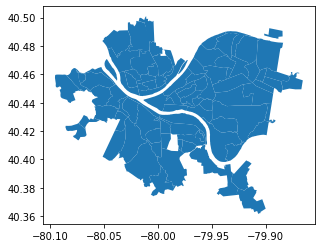

In [8]:
neighborhoods = geopandas.read_file("Neighborhoods_.shp")
neighborhoods.plot() 

I merge data according to the neighborhood, number of steps, and each neighborhood's geometry. I printed the first five results to see what this would look like in table form.

In [4]:
steps_map = neighborhoods.merge(num_steps, how='left', left_on='hood', right_on='neighborhood')

steps_map[['hood','number_of_steps','geometry']].head()

,hood,number_of_steps,geometry
0,Central Oakland,361.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,72.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,376.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,197.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,65.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


I colored the map according to each neighborhood's step score, with the lightest color representing the highest score and the darkest color representing the lowest score. 

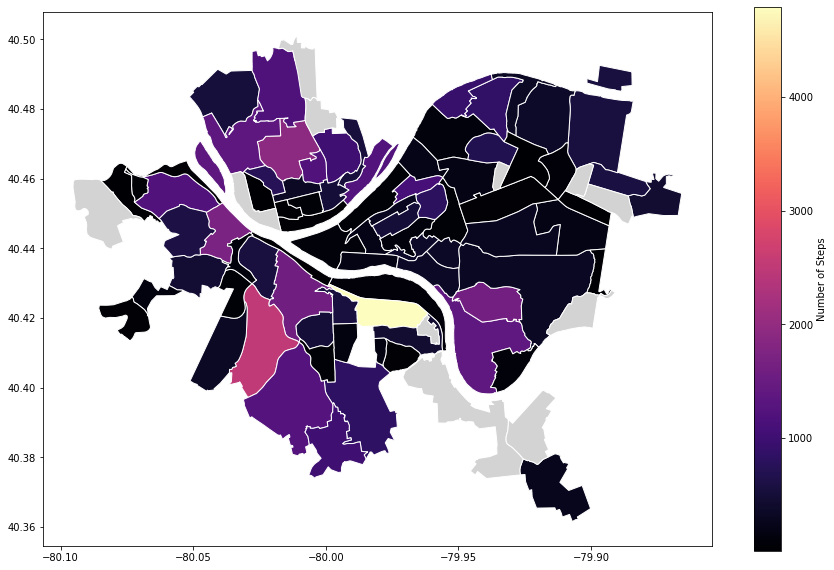

In [5]:
steps_map.plot(column='number_of_steps',
               cmap='magma',             
               edgecolor="white",       
               legend=True,              
               legend_kwds={'label': "Number of Steps"}, 
               figsize=(15, 10),       
               missing_kwds={"color": "lightgrey"} 
               )

Then I did the same for each neighborhood's transit score. First I printed out a small table to see what it would look like, then I created the map.

In [6]:
transit_score = steps.groupby("neighborhood").sum()['transit_score']
transit_score.sort_values(ascending=False)
transit_map = neighborhoods.merge(transit_score, how='left', left_on='hood', right_on='neighborhood')
transit_map[['hood','transit_score','geometry']].head()

,hood,transit_score,geometry
0,Central Oakland,29.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,15.0,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,27.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,37.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,1.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


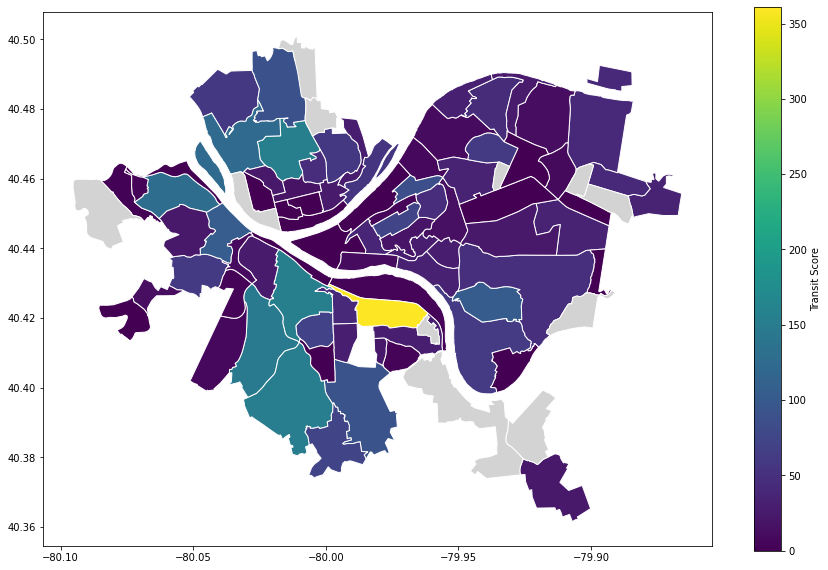

In [9]:
transit_map.plot(column='transit_score', 
               cmap='viridis',             
               edgecolor="white",      
               legend=True,             
               legend_kwds={'label': "Transit Score"}, 
               figsize=(15, 10),         
               missing_kwds={"color": "lightgrey"} 
               )

Next, I created a bar graph of the top ten neighborhoods with the highest step score, and another bar graph of the top ten neighborhoods with the highest transit score. 

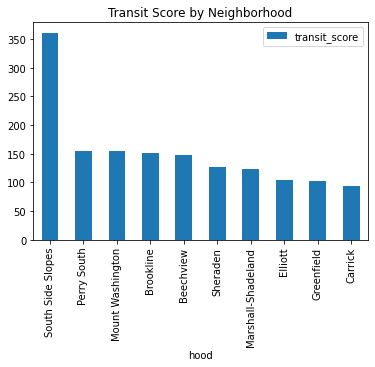

In [12]:
top_ten_transit = transit_map[['hood', 'transit_score']].sort_values('transit_score', ascending=False).head(10)
top_ten_transit
top_ten_transit.plot(kind='bar', x="hood", y="transit_score", title="Transit Score by Neighborhood")

In [13]:
top_ten_transit

,hood,transit_score
15,South Side Slopes,361.0
7,Perry South,155.0
22,Mount Washington,155.0
41,Brookline,151.0
40,Beechview,147.0
52,Sheraden,127.0
70,Marshall-Shadeland,123.0
55,Elliott,105.0
23,Greenfield,103.0
32,Carrick,93.0


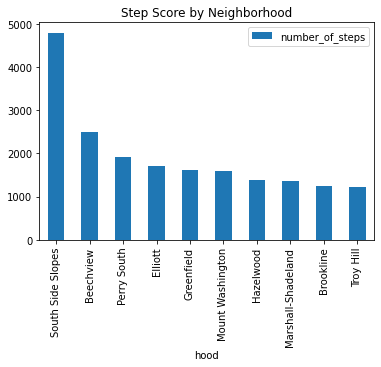

In [14]:
top_ten_steps = steps_map[['hood', 'number_of_steps']].sort_values('number_of_steps', ascending=False).head(10)
top_ten_steps.plot(kind='bar', x="hood", y="number_of_steps", title="Step Score by Neighborhood")


In [15]:
top_ten_steps

,hood,number_of_steps
15,South Side Slopes,4795.0
40,Beechview,2499.0
7,Perry South,1927.0
55,Elliott,1719.0
23,Greenfield,1611.0
22,Mount Washington,1586.0
18,Hazelwood,1374.0
70,Marshall-Shadeland,1373.0
41,Brookline,1255.0
27,Troy Hill,1231.0


## Results for metric 1: transportation habits

The winning neighborhood was South Slide Slopes by a long shot. Perry South and Beechview were runner-ups. 

The bar graphs proved to be more informative than the colorized map. It was easier to label each neighborhood and interpret their score based on height rather than color. 

Given how similar the step and transit submetrics are to each other, I feel reassured that I saw the same neighborhoods repeated in each submetric (South Side Slopes, Perry South, and Beechview). 

Therefore, I think South Side Slopes should be considered as the best neighborhood overall when it comes to the best place for recreational activity. 

## Metric 2: Ballfields (Emily)
I chose my metric as the number of ballfields in Pittsburgh. Ballfields are a great way to get exercise outdoors. If a neighborhood has a lot of ballfields, it is a good indicator that that community is an active one.

In [17]:
import pandas as pd
import geopandas as gd
from shapely.geometry import Point

ballfields = pd.read_csv("ballfields.csv", index_col = "field_name")
neighborhoods = pd.read_csv("neighborhoods.csv", index_col = "hood")

The first thing I did was import both the ballfields dataset and the neighborhood dataset. Next, I printed out the neighborhoods map and placed black dots on the map to indicate the ballfields.

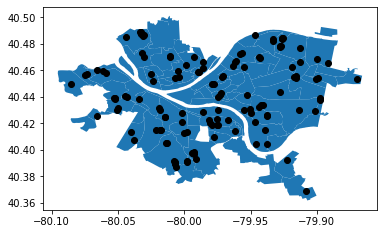

In [18]:
ballfields_map = gd.read_file("Ballfields_PGH.shp")
neighborhoods_map = gd.read_file("Neighborhoods_.shp")
axis = neighborhoods_map.plot()
ballfields_map.plot(ax = axis, color = "black")

I noticed that the ballfields dataset did not contain a 'neighborhood' column. Therefore, I had to take the 'x' and 'y' column to get the coordinate of the ballfield and check if this coordinate was within the 'geometry' field of neighborhoods_map (the shape file of the neighborhoods dataset). However, to check this, I first had to turn the coordinate into a Point, so both items were a geometry data type. If the coordinate was found within a neighborhood, the neighborhood name was added to the appropriate row in the new 'neighborhood' column I appended to the ballfields dataset.

In [19]:
neighborhood_list = []
for index, row in ballfields.iterrows():
    field_coord = Point(ballfields['x'][index], ballfields['y'][index])
    nighborhood_found = False
    for index2, row2 in neighborhoods_map.iterrows():
        geometry = row2.geometry
        if(geometry.contains(field_coord)):
            neighborhood_list.append(row2['hood'])
            neighborhood_found = True
            break
    if not neighborhood_found:
        neighborhood_list.append('N/A')
ballfields['neighborhood'] = neighborhood_list
ballfields.head(5)

,x,y,objectid,area,perimeter,ballfields,ballfiel_1,id,polygonid,scale,angle,point_x,point_y,dpw_name,cityid,active,neighborhood
field_name,,,,,,,,,,,,,,,,,
McBride Park,-79.907773,40.368990,1,0.0,0.0,1.0,1.0,72,0.0,0.0,0.0,1.367323e+06,384617.783181,Mcbride,P345,Yes,Lincoln Place
Carmalt School,-80.006456,40.386580,2,0.0,0.0,2.0,2.0,27,0.0,0.0,0.0,1.339998e+06,391710.738812,Carmalt,P299,Yes,Overbrook
Sam Bryan 2,-80.006881,40.389443,3,0.0,0.0,3.0,3.0,24,0.0,0.0,0.0,1.339906e+06,392756.625499,Sam Bryen #2,P394,Yes,Brookline
Sam Bryan 1,-80.007051,40.389711,4,0.0,0.0,4.0,4.0,23,0.0,0.0,0.0,1.339862e+06,392855.383504,Sam Bryen #1,P296,Yes,Brookline
Brookline T-Ball,-80.007183,40.390456,5,0.0,0.0,5.0,5.0,22,0.0,0.0,0.0,1.339832e+06,393127.716293,Officer Stephen J. Mayhle Memorial Park,P295,Yes,Brookline


I created an empty dictionary at the start of the code. I then iterated throughout the rows in the ballfields dataset and if the neighborhood was not in the dictionary, then I inserted it and gave it a value of 1. If the neighborhood was in the dictionary, then I just added a value of one to it. I turned this into a DataFrame called 'fields'.

In [20]:
fields_dict = {}
for index, row in ballfields.iterrows():
    hood = row['neighborhood']
    if hood in fields_dict:
        fields_dict[hood] += 1
    else:
        fields_dict[hood] = 1

fields = pd.DataFrame.from_dict(fields_dict, orient='index', columns=['num_fields'])
fields.index.name = 'neighborhood'
fields = fields.sort_values(by='num_fields', ascending=False)
fields

,num_fields
neighborhood,
Brighton Heights,7
South Side Slopes,7
Brookline,6
Carrick,5
Squirrel Hill South,5
Hazelwood,4
Morningside,4
Lower Lawrenceville,4
Mount Washington,4


I turned this dataframe into a bar graph with the top 20 neighborhoods plotted.

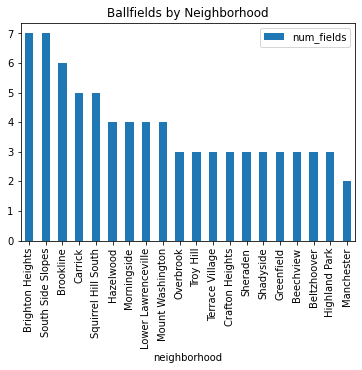

In [21]:
plot = fields.iloc[0:20].plot(kind = 'bar', title = 'Ballfields by Neighborhood')

Lastly, I took the fields DataFrame and turned it into a colored map where gray means there are no ballfields, and the colors on the map match the key on the right, with the darkest red portraying the neighborhood with the most ballfields.

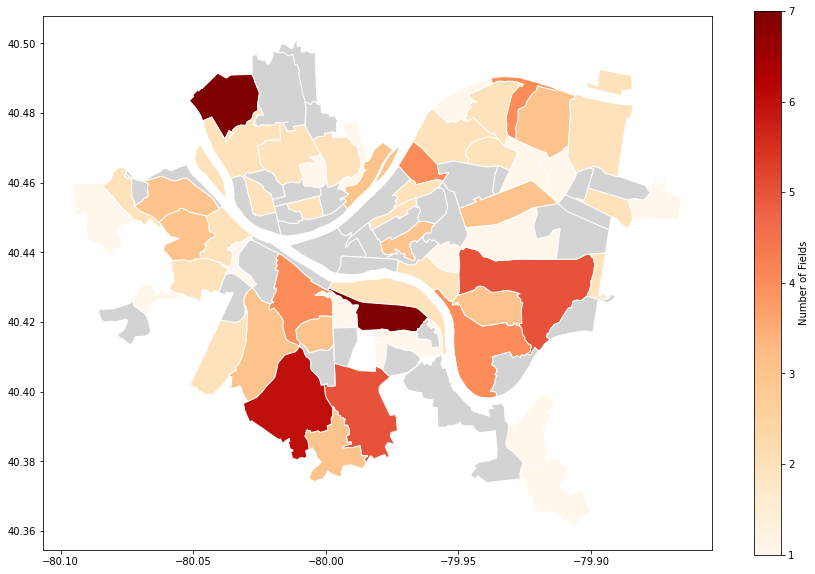

In [22]:
merged = neighborhoods_map.merge(fields, how='left', left_on='hood', right_on='neighborhood')
ballfields_map = gd.GeoDataFrame(merged, geometry='geometry')
ballfields_map.plot(column='num_fields', 
               cmap='OrRd',              
               edgecolor="white",     
               legend=True,         
               legend_kwds={'label': "Number of Fields"},
               figsize=(15, 10),     
               missing_kwds={"color": "lightgrey"} 
               )

## Reults for metric 2: ballfields
The neighborhood with the most ballfields is a tie between Brighton Heights and South Side Slopes, with both of them containing seven ballfields. The runner-up is Brookline with six ballfields. It was a confusing process figuring out to analyze this data, but once I added the neighborhood column to the ballfields data set, it was very easy to visualize these findings. Ballfields are a great way to get some outdoor exercise in. As the weather gets nicer, it's important to note that Brighton Heights and South Side Slopes are one of the best neighborhoods for getting active outside.

# Metric 3: Playgrounds (Nicole)

Taking data from Pittsburgh's neighborhoods, I decided to find the neighborhoods with the best outdoor activity measured by those with the most playgrounds. Having plenty of playgrounds is a crucial aspect for communities to play in and have fun.

In [29]:
import geopandas
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

#### Read in the playground file


After importing the tools that I will use for this analysis including pandas, geopandas, and matplotlib I read in the playground file and printed out the first 3 data points to make sure it has been properly imported

In [24]:
playground = pd.read_csv("playgrounds.csv")
playground.head(3)

,id,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,731501774,Able Long Playground,NaN,Parks - Western,Able Long Park,COAST AVE,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003192000,5,19,6,4-28,40.408365,-80.028445
1,1461276747,Albert Graham Playground,NaN,Parks - Schenley,Albert Turk Graham Park,FORESIDE PL,https://tools.wprdc.org/images/pittsburgh/play...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440519,-79.984137
2,1860709784,Alpine Playground,NaN,Parks - Northern,Alpine Gardens Park,ALPINE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457707,-80.012952


#### Condense the data

I only want to show the neighborhoods with the highest count of playgrounds, so I created a new visual that shows the neighborhood along with its corresponding tally of playgrounds

In [25]:
neighborhood_count = playground['neighborhood'].value_counts().rename_axis('Neighborhood').reset_index(name='Total')
neighborhood_count.head(8)

,Neighborhood,Total
0,Squirrel Hill South,8
1,Beechview,5
2,South Side Slopes,5
3,Highland Park,4
4,Sheraden,4
5,Beltzhoover,4
6,Allegheny Center,4
7,Carrick,3


#### Bar Graph

Now that I have enough data, I can plot it into a bar graph to compare the top 8 neighborhoods with the highest count of playgrounds

Text(0, 0.5, 'Total')

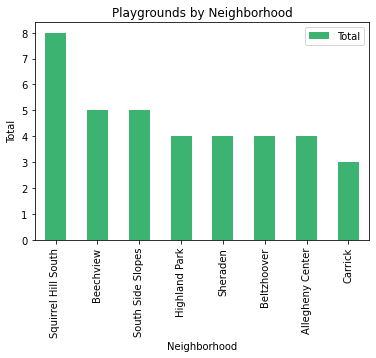

In [26]:
plot = neighborhood_count.iloc[:8].plot(kind='bar', x="Neighborhood", y="Total", title="Playgrounds by Neighborhood", color='mediumseagreen')
plot.set_xlabel("Neighborhood")
plot.set_ylabel("Total")

#### Here it shows clearly that Squirrel Hill South has the most amount of playgrounds, with a total count of 8.

Beechview and South Side Slopes were the runners up as they tied with 5 playgrounds each.

#### Next I display the map of all neighborhoods in Pittsburgh

This is my first step in getting the playground data to be shown in the map

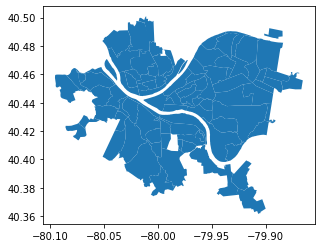

In [30]:
neighborhoods = geopandas.read_file("Neighborhoods_.shp")
neighborhoods.plot()

#### Now I merge the plain neighborhood file with my playground data.

I label the axes and set the color scale to be green, where dark green represents the neighborhoods with the highest count of playgrounds, and the lightest shade of green represents neighborhoods with the least amount of neighborhoods.

I also had to set the color of neighborhoods without any collected data to be gray as they were not considered.

Text(0.5, 1.0, 'Total Number of Playgrounds by Neighborhood')

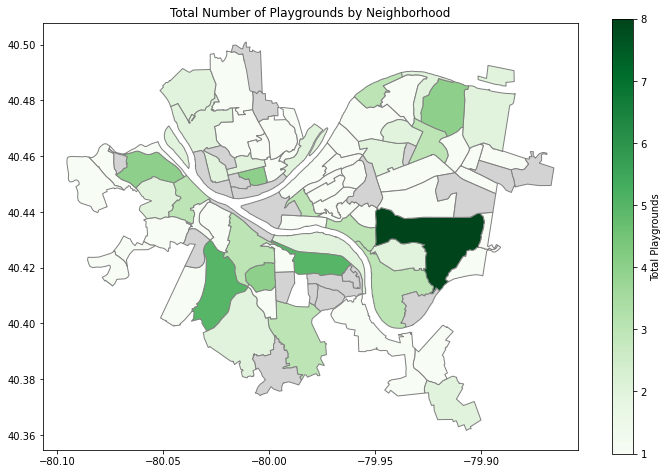

In [31]:
merged_data = neighborhoods.merge(neighborhood_count, how='left', left_on='hood', right_on='Neighborhood')

merged_data.plot(column='Total', 
                 cmap='Greens', 
                 edgecolor="gray",  
                 legend=True, 
                 legend_kwds={'label': "Total Playgrounds"}, 
                 figsize=(12, 8), 
                 missing_kwds={"color": "lightgrey"}  
                 )

plt.title("Total Number of Playgrounds by Neighborhood")

# Results for Metric 3

Squirrel Hill South is the winner for having the most playgrounds (8 total), however, Beechview and South Side Slopes (5 each) were a close tie for second place. Looking at the map, it is clear that Squirrel Hill South has a much bigger area to cover, whereas Beechview and Squirrel Hill South have a smaller neighborhood. With Squirrel Hill South being the bigger neighborhood of these 3, it makes sense that it has the most playgrounds. 

## Concluding analysis

For each metric, we ranked each neighborhood. The neighborhood with the lowest ranking would be the best for each metric. 

Rank neighborhoods by best playgrounds:

In [32]:
neighborhood_count = playground['neighborhood'].value_counts().rename_axis('neighborhood').reset_index(name='num_playgrounds')
neighborhood_count_index = neighborhood_count.reset_index().set_index('index', drop=False)
neighborhood_count_index = neighborhood_count_index.rename(columns={'index':'playground_rank'})[['playground_rank', 'neighborhood']]

neighborhood_count_index

,playground_rank,neighborhood
index,,
0,0,Squirrel Hill South
1,1,Beechview
2,2,South Side Slopes
3,3,Highland Park
4,4,Sheraden
...,...,...
63,63,Esplen
64,64,Fairywood
65,65,Regent Square


Rank neighborhoods with best ballfields:

In [33]:
ballfield_tally = ballfields['neighborhood'].value_counts().rename_axis('neighborhood').reset_index(name='num_fields')
ballfield_tally_index = ballfield_tally.reset_index().set_index('index', drop=False)
ballfield_tally_index = ballfield_tally_index.rename(columns={'index':'ballfield_rank'})[['ballfield_rank', 'neighborhood']]
ballfield_tally_index

,ballfield_rank,neighborhood
index,,
0,0,Brighton Heights
1,1,South Side Slopes
2,2,Brookline
3,3,Carrick
4,4,Squirrel Hill South
5,5,Hazelwood
6,6,Morningside
7,7,Lower Lawrenceville
8,8,Mount Washington


Rank neighborhoods with best transportation habits:

In [35]:
top_eight = top_ten_steps.merge(top_five_transit)
top_eight

,hood,number_of_steps,transit_score
0,South Side Slopes,4795.0,361.0
1,Beechview,2499.0,147.0
2,Perry South,1927.0,155.0
3,Elliott,1719.0,105.0
4,Greenfield,1611.0,103.0
5,Mount Washington,1586.0,155.0
6,Marshall-Shadeland,1373.0,123.0
7,Brookline,1255.0,151.0


I pulled the top eight neighborhoods with highest step score. I decided that their transit score was negligible, because adding the number of steps and transit score for each neighborhood would not have any significnat impact on their overall ranking. Therefore, I decided to rank neighborhoods by their step score exclusively. 

In [36]:
trans_tally = top_eight['hood'].value_counts().rename_axis('neighborhood').reset_index(name='total')
trans_tally_index = trans_tally.reset_index().set_index('index', drop=False)
trans_tally_index = trans_tally_index.rename(columns={'index':'steps_rank'})[['steps_rank', 'neighborhood']]
trans_tally_index

,steps_rank,neighborhood
index,,
0,0,South Side Slopes
1,1,Beechview
2,2,Perry South
3,3,Elliott
4,4,Greenfield
5,5,Mount Washington
6,6,Marshall-Shadeland
7,7,Brookline


In [37]:
merge = neighborhood_count_index.merge(trans_tally_index, on='neighborhood').merge(ballfield_tally_index, on='neighborhood')
merge['sum'] = merge['playground_rank']+merge['steps_rank']+merge['ballfield_rank']
merge[['neighborhood', 'sum', 'playground_rank', 'steps_rank', 'ballfield_rank']].sort_values(by='sum')

,neighborhood,sum,playground_rank,steps_rank,ballfield_rank
1,South Side Slopes,3,2,0,1
0,Beechview,18,1,1,16
2,Mount Washington,21,8,5,8
4,Greenfield,36,17,4,15
6,Brookline,36,27,7,2
5,Marshall-Shadeland,48,21,6,21
3,Elliott,49,9,3,37
7,Perry South,68,46,2,20


Now that we have a table of the top eight neighborhoods and their scores for playgrounds, steps, and ballfields; we calculate the sum of their rankings. The neighborhood with the lowest sum wins, which is South Side Slopes!

## Conclusion

### Winning neighborhood: South Side Slopes

Ly: 
My personal favorite neighborhood is Shadyside. It is a very walkable area, and I often see a lot of families outside whenever I visit. However, I can see why South Side Slopes won. It has the most playgrounds and ballparks, compared to Shadyside, and its residents lead a more active lifestyle according to their rankings. 

Emily: The data driven determination of the “best neighborhood” matches my own finding of the best neighborhood. In my research, it is the neighborhood with the most ballfields, and in my group member’s research, it is the neighborhood that tied for second in number of playgrounds and had the best step score. This neighborhood has a lot of opportunities for getting active outdoors, so it is the best neighborhood for this purpose.

Nicole: I was surprised that my favorite neighbrhood, Lawrenceville, was not a top contender in this analysis of the best neighborhoods for outdoor activities. I thought that Lawrenceville would be active in outdoor activities, but I was wrong. South Side Slopes was the clear winner and ranked in the top 5 in of our each of our datasets